In [137]:
import sqlite3
conn = sqlite3.connect('task1_7.db')  
c = conn.cursor()

In [138]:
request = "DROP TABLE if exists table1"
c.execute(request)

In [139]:
request = '''CREATE TABLE table1(id INTEGER, num1 INTEGER, num2 INTEGER, num3 INTEGER)'''
c.execute(request)
tables = c.fetchall()

In [140]:
request = '''INSERT INTO table1
   WITH RECURSIVE
      cnt( id, num1, num2, num3) AS (
      VALUES(1
      , round(abs(random()*0.0000000000000001),0)
      , round(abs(random()*0.0000000000000001),0)
      , round(abs(random()*0.0000000000000001),0)) 
      UNION ALL 
      SELECT id+1
      , round(abs(random()*0.0000000000000001),0)
      , round(abs(random()*0.0000000000000001),0)
      , round(abs(random()*0.0000000000000001),0) FROM cnt WHERE id < 1000)
    select * from cnt'''
c.execute(request)
results = c.fetchall()

In [141]:
c.execute("ALTER TABLE table1 DROP column id")
results = c.fetchall()

In [142]:
request = '''SELECT * from table1'''
c.execute(request)
results = c.fetchall()
results

[(463, 25, 357),
 (58, 86, 219),
 (503, 544, 153),
 (379, 789, 539),
 (873, 450, 488),
 (809, 581, 748),
 (519, 578, 400),
 (680, 208, 121),
 (297, 858, 864),
 (141, 340, 870),
 (549, 867, 356),
 (641, 466, 553),
 (427, 451, 543),
 (658, 832, 833),
 (649, 143, 602),
 (375, 45, 691),
 (131, 330, 312),
 (582, 553, 8),
 (571, 809, 549),
 (480, 515, 875),
 (739, 624, 425),
 (569, 363, 98),
 (281, 567, 727),
 (296, 742, 548),
 (29, 75, 872),
 (610, 184, 722),
 (222, 613, 444),
 (216, 832, 564),
 (428, 680, 619),
 (208, 400, 203),
 (652, 250, 868),
 (300, 225, 533),
 (675, 184, 417),
 (333, 795, 500),
 (920, 734, 545),
 (66, 524, 216),
 (353, 622, 333),
 (613, 194, 918),
 (516, 543, 114),
 (663, 664, 241),
 (336, 628, 569),
 (205, 53, 922),
 (705, 79, 17),
 (514, 93, 621),
 (833, 66, 119),
 (315, 213, 721),
 (329, 824, 247),
 (380, 890, 783),
 (475, 181, 494),
 (161, 489, 321),
 (242, 562, 343),
 (9, 546, 902),
 (692, 528, 578),
 (591, 728, 462),
 (492, 526, 898),
 (725, 199, 636),
 (401, 25

In [143]:
import pandas as pd
df = pd.read_sql_query(request, conn)
df

num1  num2  num3
0     463    25   357
1      58    86   219
2     503   544   153
3     379   789   539
4     873   450   488
..    ...   ...   ...
995    28   183   104
996   376   550   128
997   196   665   514
998   838   478   424
999   889   862   761

[1000 rows x 3 columns]

Text(0.5, 1.0, 'Распределение величин num1, num2, num3')

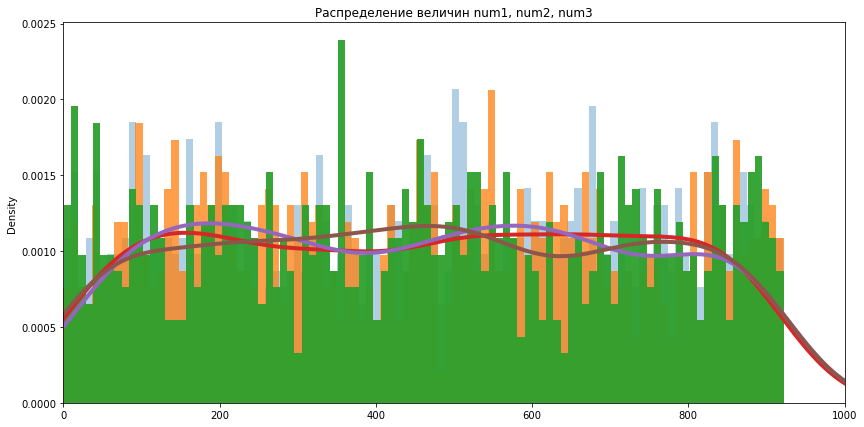

In [144]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

plt.figure(figsize=(14,7))
df['num1'].hist(bins=100, alpha=0.35, density=True)
df['num2'].hist(bins=100, alpha=0.75, density=True)
df['num3'].hist(bins=100, alpha=0.95, density=True)
df['num1'].plot(kind='kde', linewidth=4)
df['num2'].plot(kind='kde', linewidth=4)
df['num3'].plot(kind='kde', linewidth=4)
plt.xlim(0,1000)
plt.title("Распределение величин num1, num2, num3")

In [145]:
plt.figure(figsize=(14,7))
df['num2'].hist(bins=100, alpha=0.75, density=True)
df['num2'].plot(kind='kde', linewidth=4)
plt.xlim(0,1000)
plt.title("Распределение величины num2")

Text(0.5, 1.0, 'Распределение величины num2')

Text(0.5, 1.0, 'Распределение величины num3')

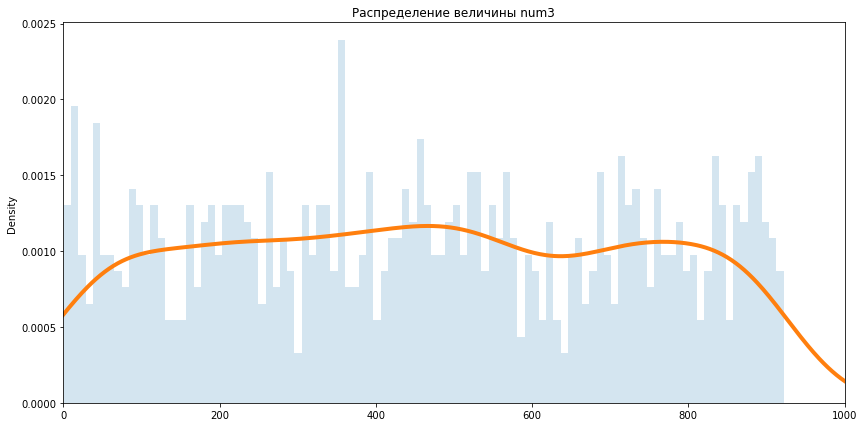

In [146]:
plt.figure(figsize=(14,7))
df['num3'].hist(bins=100, alpha=0.19, density=True)
df['num3'].plot(kind='kde', linewidth=4)
plt.xlim(0,1000)
plt.title("Распределение величины num3")